### NUMERICAL INTEGRATION II

### Using 2st order Lagrange polynomial: Simpson 1/3 approximation
(3/8 we didnt derive)
* we can follow exactly the same steps as for the derivation of the trapezoid formula but instead of n=1, we substitute n=2: 

* we can see that the curve approximating between two points is not straingt but parabolic 

<img src="imgs/simpson.png" width="300" />

$$ I = \frac{h}{3}[f(x_0)+ 4 f(x_1) + f(x_2)] - \frac{h^5}{90} f''''(\zeta)$$

*Simpson 1/3 approximation uses three points and can integrate second order polynomials exactly

h=0.01

### Multiple application of the Simpson 1/3 formula

<img src="imgs/simpson_multiple.png" width="300" />

$$I \approx \frac{h}{3} \left[ f(x_0) + 4\sum_{i=1,3,5}^{n-1} f(x_i) + 2\sum_{i=2,4,6}^{n-1} f(x_i) + f(x_n)\right]$$

odd numbers =1,3,5,7,
even numbers = 2,4,6,8


## Note
* ***Trapezoids's approximation uses two points and can integrate first order polynomials exactly***


* ***Simpson's approximation uses three points and can integrate second order polynomials exactly***

### Example using Simpsons integration scheme

Let say we want to calculate  the following $\int_{0}^{\pi}sin(x) dx$ using Simpsons rule dividing the integral by 4 segments.

* $n=4$
* $h=\frac{b-a}{n} = \pi/4$
* $x_0=0$
* $x_1=\pi/4$
* $x_2=\pi/2$
* $x_3=3\pi/4$
* $x_4=\pi$



* the indices odd have factor $4$
* the indices even have factor $2$
* except the first and the last element

$$I\approx  \frac{h}{3} [ f(x_0) + 4 f(x_1) + 2f(x_2) +4f(x_3)+ f(x_4)]$$
$$I\approx  \frac{\pi}{4*3} [ sin(0) + 4 sin(\pi/4) + 2 sin(\pi/2) + 4f sin(3 \pi/4)+ sin(\pi)] =  2.004560$$
* analytically I=2.0

### Comparison between Trapezoid and Simpson approximations:
$\int_0^2 f(x) dx$

* Trapezoid: $ I \approx f(0)+ f(2) $
* Simpson: $ I \approx \frac{1}{3} [f(0)+ 4 f(1) + f(2)] $

if $f(x)=x^2$

* Trapezoid: $ \int_0^2 x^2 dx \approx 0^2+ 2^2 = 4 $
* Simpson: $ \int_0^2 x^2 dx \approx \frac{1}{3} [0^2 + 4 * 1^2 + 2^2] = \frac{8}{3} = 2.666666666$

<img src="imgs/trapezoid_simpson_comparison.png" width="800" />

* QUESTION: WHY IS THE SIMPSON APPROXIMATION GIVING EXACTLY THE SAME RESULT AS ANALYTICAL?

### Other methods than Trapezoid or Simpson
There are far more sophisticated methods than Simpson or Trapezoid.
One that is most commonly used in the sicpy library is called "quad" (quadrature $\sim$ integral) and can be imported by: 


`import scipy.integrate  as  integrate `

`I=integrate.quad(...)`



The manual of the quad says: "For finite integration limits, the integration is performed using a Clenshaw-Curtis method which uses Chebyshev moments. ... If one of the integration limits is infinite, then a Fourier integral is computed (assuming w neq 0)."
... "quad is implementeed using a technique from the Fortran library QUADPACK." \
*rather complicated

https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

## Convenient numerical integration using python scipy package
* in real life there are two different kind of problems we ca encounter

    $\rightarrow$ a) we have data (experimental) point x, y and we want to find the integral (area under the curve) !!! ***integrate.trapz(y,x)*** ***integrate.simps(y,x)***

    $\rightarrow$ b) we have the analytical form of the fuction: x, y and we want to find the integral (area under the curve) !!!
***I,error = integrate.quad(integrand, lim1, lim2, args=(a,b))***


***remember that the result of th numerical integral is a number*** 

### a) Lets assume that we have a set of points (here w generate using np.sin but we can actually use any values)

In [1]:
#x=np.linspace(0,np.pi,10)
#y = np.sin(x)
#np.savetxt('xvec.txt', x)
#np.savetxt('yvec.txt', y)

In [22]:
import numpy as np
x=np.loadtxt('xvec.txt')
y=np.loadtxt('yvec.txt')

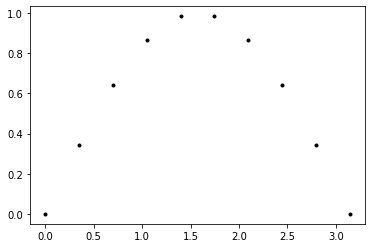

In [23]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.k')

In [24]:
import scipy

In [25]:
I_trapz=scipy.integrate.trapz(y,x)

In [6]:
print('I trapezoid',I_trapz)

I trapezoid 1.9796508112164835


In [26]:
I_simps=scipy.integrate.simps(y,x)

In [27]:
print('I Simpson',I_simps)

I Simpson 1.9995487365804028


### b) Lets assume that we know the function:
### Example 1.

In [18]:
def integrand(x):
    return np.sin(x)

In [19]:
import scipy.integrate as integrate

In [20]:
I_quad,error=integrate.quad(integrand,0,np.pi)

In [21]:
print('I quad',I_quad,'+/-',error)

I quad 2.0 +/- 2.220446049250313e-14


### Example 2.

In [13]:
def integrand2(x,a):
    return a*np.sin(x)

In [14]:
a=10
b=-3
I_quad,error=integrate.quad(integrand2,0,np.pi,args=(a,))

In [15]:
print('I quad',I_quad,'+/-',error)

I quad 20.0 +/- 2.220446049250313e-13


[0, 1, 2, 3, 4]
[0.0, 2.0, 4.0, 6.0, 8.0]


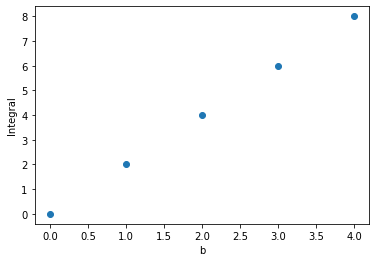

In [17]:
## If we want to loop through arguments:
a=10.0
Is=[]
bs=[0,1,2,3,4]
for b in bs:
    I,error = integrate.quad(integrand2, 0, np.pi, args=(b,))
    Is.append(I)
fig,ax = plt.subplots(1,1)
ax.scatter(bs,Is)
ax.set_xlabel('b')
ax.set_ylabel('Integral')
print(bs)
print(Is)
# thi

### Example 2
Solve numerically following integral

$ I= \int_{0}^{10}\frac{300* x}{1 + e^x}$

### Example 3 

Solve the following integral numerically

$$I = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx$$

Initially b=2

Then make a plot for $I$ vs 10 different values of b=[0,1,2,3,4,5,6,7,8,9] 